In [1]:
import pandas as pd
import numpy as np
import os
import arrow

#### 1.数据导入

In [6]:
file_path = r'D:\rui\code_analysis\课程资料\6. 综合专题二：基于高铁余票的客流行为特征及其效应分析\12306data'
file = os.path.join(file_path,'Ninghu-2016-12-21.csv')

In [7]:
df_Ninghu = pd.read_csv(file)

In [10]:
df_Ninghu.head()

,54000G702940,G7029,南京,镇江,05:49,0,0.1,94,993,0.2,2016-12-21,00:00
0,54000G703350,G7033,南京,镇江,06:06,0,0,43,493,160,2016-12-21,00:00
1,54000G710140,G7101,南京,镇江,06:11,0,0,46,509,164,2016-12-21,00:00
2,54000G703530,G7035,南京,镇江,06:31,0,0,48,493,167,2016-12-21,00:00
3,5l000G758100,G7581,南京南,镇江,06:45,10,0,24,417,147,2016-12-21,00:00
4,5l000G750550,G7505,南京南,镇江南,07:13,25,0,92,432,260,2016-12-21,00:00


#### 2.数据整理

In [16]:
#添加表头
df_Ninghu = pd.read_csv(file,names=['编号', '车次', '发车站', '到达站', '发车时间', '商务特等座',
                                    '动卧', '一等座', '二等座','无座','记录日期','记录时间'])

In [17]:
df_Ninghu.tail()

,编号,车次,发车站,到达站,发车时间,商务特等座,动卧,一等座,二等座,无座,记录日期,记录时间
2445513,240000G1570H,G157,无锡东,上海虹桥,22:54,8,0,63,657,0,2016-12-21,23:03
2445514,240000G1570H,G157,无锡东,上海虹桥,22:54,8,0,63,657,0,2016-12-21,23:05
2445515,4f000G194200,G1939,苏州北,上海虹桥,22:52,10,0,22,428,0,2016-12-21,23:05
2445516,240000G1570H,G157,无锡东,上海虹桥,22:54,8,0,63,657,0,2016-12-21,23:06
2445517,240000G1570H,G157,无锡东,上海虹桥,22:54,8,0,63,657,0,2016-12-21,23:07


In [36]:
#用正则表达式过滤错误时间的信息
df_Ninghu = df_Ninghu[df_Ninghu['发车时间'].str.contains('0[3-9]:|1[0-9]:|2[0-3]:')]

In [61]:
#arrow时间推移
arrow.get('have a time 2020-06-21 ,maybe you can extract date in it','YYYY-MM-DD').shift(days=+100)

<Arrow [2020-09-29T00:00:00+00:00]>

In [70]:
df_Ninghu['停售时间'] = df_Ninghu['发车时间'].apply(lambda x:arrow.get(x,'HH:mm').shift(minutes=-30).format('HH:mm'))

In [71]:
df_Ninghu.head()

,编号,车次,发车站,到达站,发车时间,商务特等座,动卧,一等座,二等座,无座,记录日期,记录时间,停售时间
0,54000G702940,G7029,南京,镇江,05:49,0,0,94,993,0,2016-12-21,00:00,05:19
1,54000G703350,G7033,南京,镇江,06:06,0,0,43,493,160,2016-12-21,00:00,05:36
2,54000G710140,G7101,南京,镇江,06:11,0,0,46,509,164,2016-12-21,00:00,05:41
3,54000G703530,G7035,南京,镇江,06:31,0,0,48,493,167,2016-12-21,00:00,06:01
4,5l000G758100,G7581,南京南,镇江,06:45,10,0,24,417,147,2016-12-21,00:00,06:15


In [72]:
#过滤出在停售时间的记录
df_Ninghu_use = df_Ninghu[df_Ninghu['记录时间'] == df_Ninghu['停售时间']]

In [74]:
len(df_Ninghu_use)

2785

In [75]:
#新增总余票量
df_Ninghu_use['总票数'] = df_Ninghu_use['商务特等座'] + df_Ninghu_use['动卧'] +\
df_Ninghu_use['一等座'] + df_Ninghu_use['二等座'] + df_Ninghu_use['无座']

C:\Users\cc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df_Ninghu_use = pd.read_csv(r'../../file/subject/df_Ninghu_use.csv')

In [60]:
df_Ninghu_use.head()

,Unnamed: 0,编号,车次,发车站,到达站,发车时间,商务特等座,动卧,一等座,二等座,无座,记录日期,记录时间,停售时间,总票数
0,503668,4f0000D3080F,D305,南京,苏州,03:30,0,0,0,117,18,2016-12-21,03:00,03:00,135
1,503914,4f0000D3080F,D305,南京,上海,03:30,0,0,0,91,18,2016-12-21,03:00,03:00,109
2,746951,240000D3130S,D313,南京,苏州,04:57,0,0,0,11,13,2016-12-21,04:27,04:27,24
3,747196,240000D3130S,D313,南京,上海,04:57,0,0,0,0,0,2016-12-21,04:27,04:27,0
4,850902,4f0000D3080F,D305,苏州,上海,05:34,0,0,0,84,18,2016-12-21,05:04,05:04,102


In [62]:
#查看发车站南京有几个车站
df_Ninghu_use[df_Ninghu_use['发车站'].str.contains('南京')].drop_duplicates(subset='发车站')

,Unnamed: 0,编号,车次,发车站,到达站,发车时间,商务特等座,动卧,一等座,二等座,无座,记录日期,记录时间,停售时间,总票数
0,503668,4f0000D3080F,D305,南京,苏州,03:30,0,0,0,117,18,2016-12-21,03:00,03:00,135
11,904992,5l000G703100,G7031,南京南,丹阳,05:54,8,0,20,414,141,2016-12-21,05:24,05:24,583


In [66]:
#查看到达站上海有几个车站
df_Ninghu_use[df_Ninghu_use['到达站'].str.contains('上海')].drop_duplicates(subset='到达站')

,Unnamed: 0,编号,车次,发车站,到达站,发车时间,商务特等座,动卧,一等座,二等座,无座,记录日期,记录时间,停售时间,总票数
1,503914,4f0000D3080F,D305,南京,上海,03:30,0,0,0,91,18,2016-12-21,03:00,03:00,109
28,953644,54000G710140,G7101,南京,上海虹桥,06:11,0,0,0,0,0,2016-12-21,05:41,05:41,0


In [74]:
#用逻辑连接符过滤出上海到南京的所有数据
#方法一：
df_Ninghu_use2 = df_Ninghu_use[((df_Ninghu_use['发车站'] == '南京') | (df_Ninghu_use['发车站'] == '南京南')) \
                               & ((df_Ninghu_use['到达站'] == '上海') | (df_Ninghu_use['到达站'] == '上海虹桥'))]
len(df_Ninghu_use2)

200

In [70]:
#Select DataFrame Rows Based on multiple conditions on columns
#方法二：
df_Ninghu_use2 = df_Ninghu_use[(df_Ninghu_use['发车站'].str.contains('南京')) & (df_Ninghu_use['到达站'].str.contains('上海'))]
len(df_Ninghu_use2)

200

#### 3.数据可视化

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体为黑体
plt.rcParams['axes.unicode_minus']=False#显示负号

In [75]:
#按照发车时间求出总余票数
gb = df_Ninghu_use2.groupby(by='发车时间').sum()['总票数']

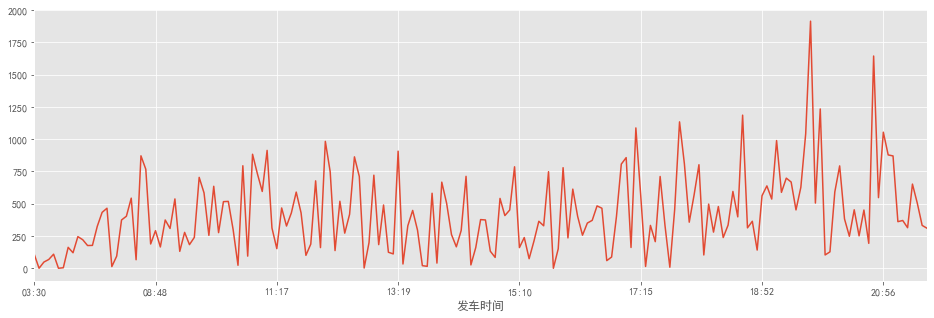

In [80]:
gb.plot(figsize=(16,5))

In [112]:
#groupby后的series对象index获取索引获取
len(gb.index[xtk[::6]])
len(xtk[::6])

31

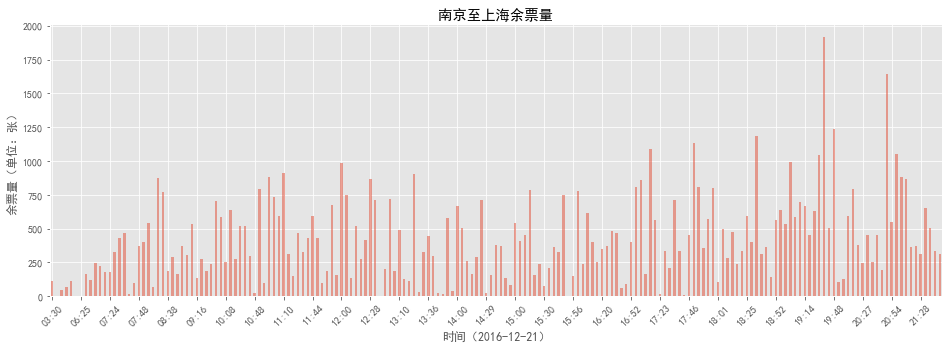

In [117]:
#图形优化
plt.figure(figsize=(16,5))
gb.plot(kind='bar',alpha=0.5)
xtk = np.arange(len(gb))
plt.xticks(xtk[::6],gb.index[xtk[::6]],size=10,rotation=45)
plt.xlabel('时间（2016-12-21）',size=12)
plt.ylabel('余票量（单位：张）',size=12)
plt.title('南京至上海余票量')
plt.show()

#### 4.代码整理